# Traffic Light Optimization: Using the GA
This guide demonstrates how to use the genetic algorithm to optimize traffic light timings in a SUMO network for reduced fuel consumption, CO₂ emissions, and waiting time.

**Note:** Before running this tutorial, please complete all steps in `setup.ipynb` to ensure the environment and dependencies are properly configured.

## Baseline: Running SUMO on Default Traffic Light Settings

Before applying the genetic algorithm, let's evaluate the performance of the default traffic light settings in the provided SUMO network. This will serve as a baseline for comparison.

In [17]:
# Run SUMO on the default network and evaluate fitness (no GA)
import sys
import os
sys.path.append('scripts')
from ga import evaluate_fitness
from run_sumo import run_sumo

# Set up paths for the default scenario
default_dir = 'sumo/defaults/mckenzie/verybasic'
netxml = os.path.join(default_dir, 'mckenzie-verybasic.net.xml')
rouxml = os.path.join(default_dir, 'mckenzie-verybasic.rou.xml')
working_dir = 'sumo/defaults/mckenzie/verybasic'  # Use same as input for baseline
emission_file = os.path.join(working_dir, 'baseline_emissions.xml')

# Evaluate fitness for the default settings
fitness = evaluate_fitness(
    netxml_path=netxml,
    rouxml_path=rouxml,
    working_dir=working_dir,
    run_sumo_func=run_sumo,
    emission_file=emission_file
)

print(f"Baseline fitness (negative sum of CO2, fuel, waiting): {fitness:.2f}")

# Optionally, parse and display the emission file for more details
import xml.etree.ElementTree as ET
try:
    tree = ET.parse(emission_file)
    root = tree.getroot()
    total_co2 = 0.0
    total_fuel = 0.0
    total_waiting = 0.0
    for timestep in root.findall('timestep'):
        for vehicle in timestep.findall('vehicle'):
            total_co2 += float(vehicle.get('CO2', 0))
            total_fuel += float(vehicle.get('fuel', 0))
            total_waiting += float(vehicle.get('waiting', 0))
    print(f"Total CO2: {total_co2:.2f}")
    print(f"Total Fuel: {total_fuel:.2f}")
    print(f"Total Waiting: {total_waiting:.2f}")
except Exception as e:
    print(f"Could not parse emission file: {e}")

Step #495.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
Baseline fitness (negative sum of CO2, fuel, waiting): -95411114.51
Total CO2: 71945818.69
Total Fuel: 23323881.82
Total Waiting: 141414.00


## Running the Genetic Algorithm and Visualizing Results

This section demonstrates how to use the genetic algorithm tool to optimize traffic light timings for reduced fuel, CO₂, and waiting time, and how to visualize the results.

In [23]:
# Run the Genetic Algorithm (from Python)
import sys
import datetime
sys.path.append('scripts')
from ga import genetic_algorithm
from run_sumo import run_sumo

#########Change these to match your paths#########################
input_dir = 'sumo/defaults/mckenzie/verybasic'  # Folder with .net.xml and .rou.xml
# Generate a unique output directory name with timestamp
timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
output_dir = f'sumo/run_{timestamp}'   # Output folder for results
working_dir = f'{output_dir}/genes'
num_generations = 9
##################################################################

genetic_algorithm(
    input_dir=input_dir,
    working_dir=working_dir,
    output_dir=output_dir,
    run_sumo_func=run_sumo,
    population_size=6,
    generations=num_generations,
    mutation_rate=0.2,
    elite_size=2
)

Generation 1


Step #726.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 1: Fitness = -149477007.10002157


Step #660.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 2: Fitness = -128613124.89001107


Step #663.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 3: Fitness = -125562196.74001051


Step #666.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 4: Fitness = -123367931.46000943


Step #585.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 5: Fitness = -116612192.0800074


Step #675.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 6: Fitness = -129303731.95000765
Generation 2


Step #588.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 1: Fitness = -117745941.5300093


Step #562.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 2: Fitness = -110132423.25000435


Step #562.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 3: Fitness = -110132423.25000435


Step #562.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 4: Fitness = -110132423.25000435


Step #583.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 5: Fitness = -115091262.17000741


Step #583.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 6: Fitness = -115091262.17000741
Generation 3


Step #613.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 1: Fitness = -127932001.9400106


Step #613.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 2: Fitness = -127932001.9400106


Step #613.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 3: Fitness = -127932001.9400106


Step #613.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 4: Fitness = -127932001.9400106


Step #613.00 (1ms ~= 1000.00*RT, ~0.00UPS, vehicles TOT 300 ACT 0 BUF 0)                  
  Individual 5: Fitness = -127932001.9400106


Step #613.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 6: Fitness = -127932001.9400106
Generation 4


Step #565.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 1: Fitness = -104504180.15000196


Step #565.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 2: Fitness = -104504180.15000196


Step #565.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 3: Fitness = -104504180.15000196


Step #565.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 4: Fitness = -104504180.15000196


Step #565.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 5: Fitness = -104504180.15000196


Step #565.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 6: Fitness = -104504180.15000196
Generation 5


Step #554.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 1: Fitness = -105911379.3300051


Step #554.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 2: Fitness = -105911379.3300051


Step #554.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 3: Fitness = -105911379.3300051


Step #554.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 4: Fitness = -105911379.3300051


Step #554.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 5: Fitness = -105911379.3300051


Step #554.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 6: Fitness = -105911379.3300051
Generation 6


Step #647.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 1: Fitness = -131439323.8600108


Step #647.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 2: Fitness = -131439323.8600108


Step #647.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 3: Fitness = -131439323.8600108


Step #647.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 4: Fitness = -131439323.8600108


Step #647.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 5: Fitness = -131439323.8600108


Step #647.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 6: Fitness = -131439323.8600108
Generation 7


Step #809.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 1: Fitness = -153885218.02002472


Step #809.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 2: Fitness = -153885218.02002472


Step #809.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 3: Fitness = -153885218.02002472


Step #809.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 4: Fitness = -153885218.02002472


Step #809.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 5: Fitness = -153885218.02002472


Step #809.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 6: Fitness = -153885218.02002472
Generation 8


Step #1227.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                              
  Individual 1: Fitness = -288865233.97010314


Step #1227.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                              
  Individual 2: Fitness = -288865233.97010314


Step #1227.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                              
  Individual 3: Fitness = -288865233.97010314


Step #1227.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                              
  Individual 4: Fitness = -288865233.97010314


Step #1227.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                              
  Individual 5: Fitness = -288865233.97010314


Step #1227.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                              
  Individual 6: Fitness = -288865233.97010314
Generation 9


Step #757.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 1: Fitness = -171182776.29003257


Step #757.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 2: Fitness = -171182776.29003257


Step #757.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 3: Fitness = -171182776.29003257


Step #757.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 4: Fitness = -171182776.29003257


Step #757.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 5: Fitness = -171182776.29003257


Step #757.00 (0ms ?*RT. ?UPS, vehicles TOT 300 ACT 0 BUF 0)                               
  Individual 6: Fitness = -171182776.29003257
GA complete.
All variants summary written to sumo/run_20250728_115800/ga_top_variants.csv


### Output Files

- The `output_dir/genes/` folder contains all generated network and emissions files for each GA individual.
- The `output_dir/ga_top_variants.csv` file summarizes the top-performing variants and their traffic light settings.

You can use these files to analyze and visualize the optimization results.

In [24]:
import pandas as pd

# Load the summary CSV
summary_path = f'{output_dir}/ga_top_variants.csv'
df_summary = pd.read_csv(summary_path)
df_summary.head()

,Rank,Generation,Individual,Fitness (negative),Phase Settings
0,1,4,1,-1.045042e+08,"TL0_P0:duration=54,minDur=16,maxDur=38 | TL0_P..."
1,2,4,2,-1.045042e+08,"TL0_P0:duration=54,minDur=16,maxDur=38 | TL0_P..."
2,3,4,3,-1.045042e+08,"TL0_P0:duration=54,minDur=16,maxDur=38 | TL0_P..."
3,4,4,4,-1.045042e+08,"TL0_P0:duration=54,minDur=16,maxDur=38 | TL0_P..."
4,5,4,5,-1.045042e+08,"TL0_P0:duration=54,minDur=16,maxDur=38 | TL0_P..."


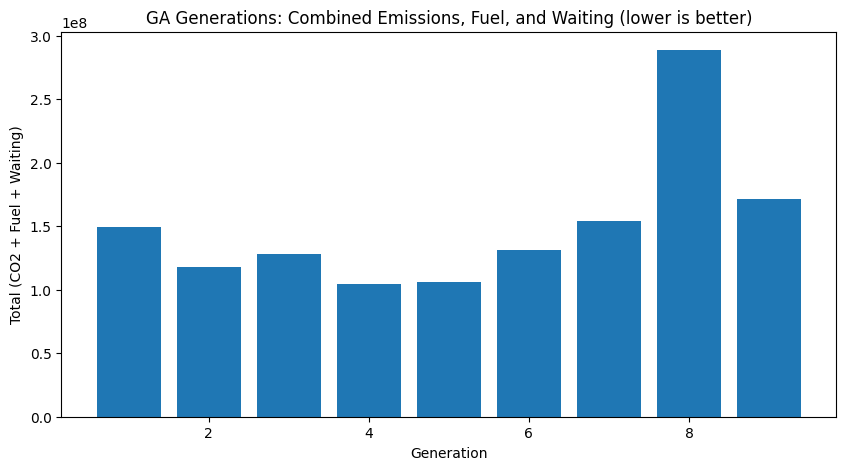

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
bars = plt.bar(df_summary['Generation'], -df_summary['Fitness (negative)'])
plt.xlabel('Generation')
plt.ylabel('Total (CO2 + Fuel + Waiting)')
plt.title('GA Generations: Combined Emissions, Fuel, and Waiting (lower is better)')

# Add value labels inside the bars
for bar in bars:
    height = bar.get_height()


plt.show()